In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import json
from datetime import datetime


2024-02-08


In [175]:
current_date = datetime.now().strftime('%Y-%m-%d')
url = 'https://matomo.creaf.cat/index.php?module=API&format=JSON&idSite=5&period=range&date=2023-01-01,' + current_date + '&method=Live.getLastVisitsDetails&filter_limit=-1&expanded=1'
token = json.load(open('matomo_params.json', 'r'))['token']
payload = {
    # Add other required parameters here
    'module': 'API',
    'method': 'API_method_you_want_to_call',
    'format': 'json',
    'token_auth': token
}

response = req.post(url, data=payload)
data = response.json()
df = pd.DataFrame(data)

df = df[(~df['city'].isin(['Bellaterra', 'Canovelles', 'Sabadell'])) & (pd.notna(df['visitIp']) & (df['visitIp'] != '158.109.0.0'))]


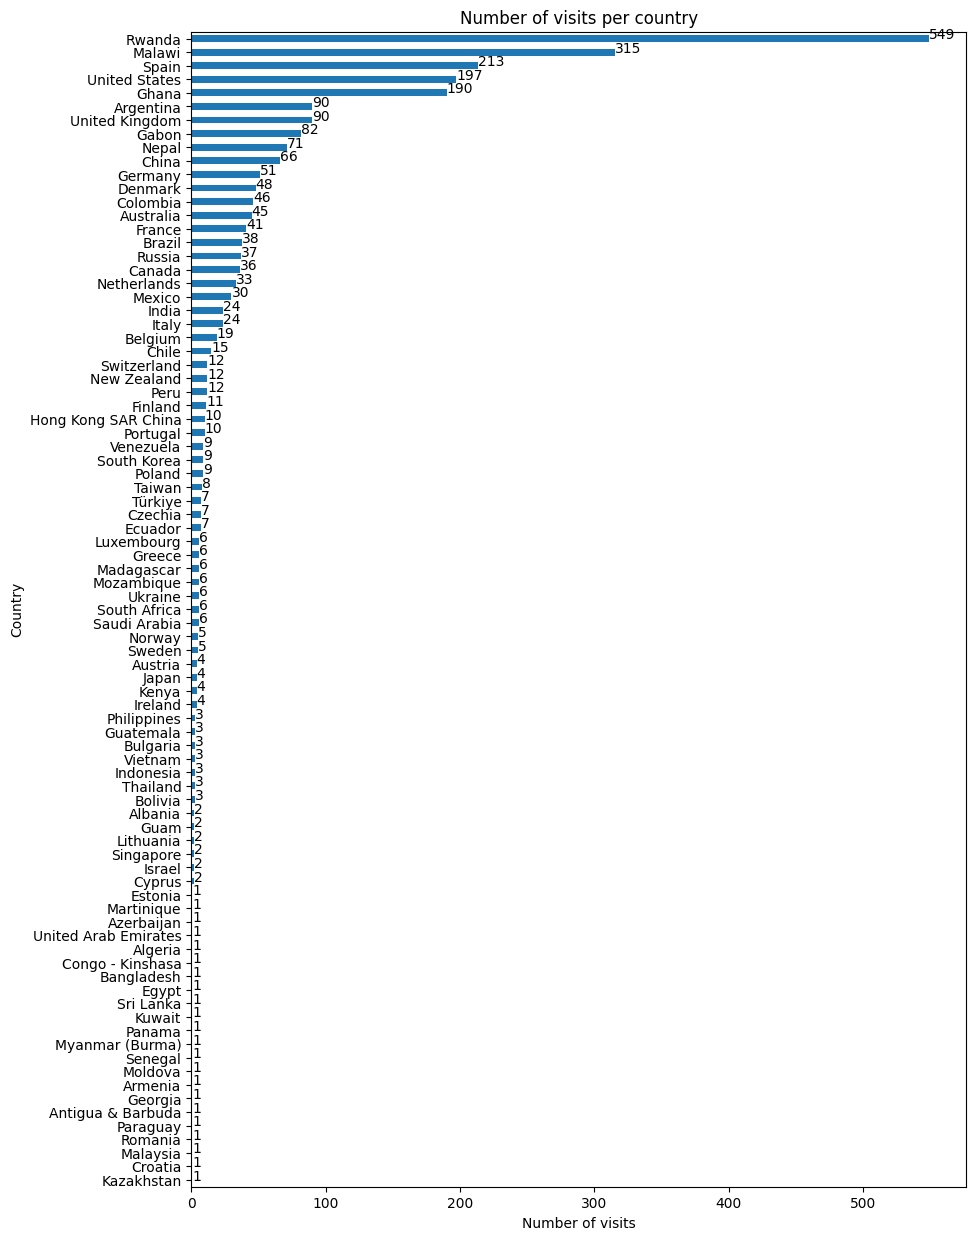

In [176]:
country_counts = df['country'].value_counts()
country_counts.plot(kind='barh', figsize=(10, 15))

# Invert the y-axis to have the country with the highest count at the top
plt.gca().invert_yaxis()

# Adding labels and title for clarity
plt.xlabel('Number of visits')
plt.ylabel('Country')
plt.title('Number of visits per country')

for index, value in enumerate(country_counts):
    plt.text(value, index, str(value))

# Show the plot
plt.show()


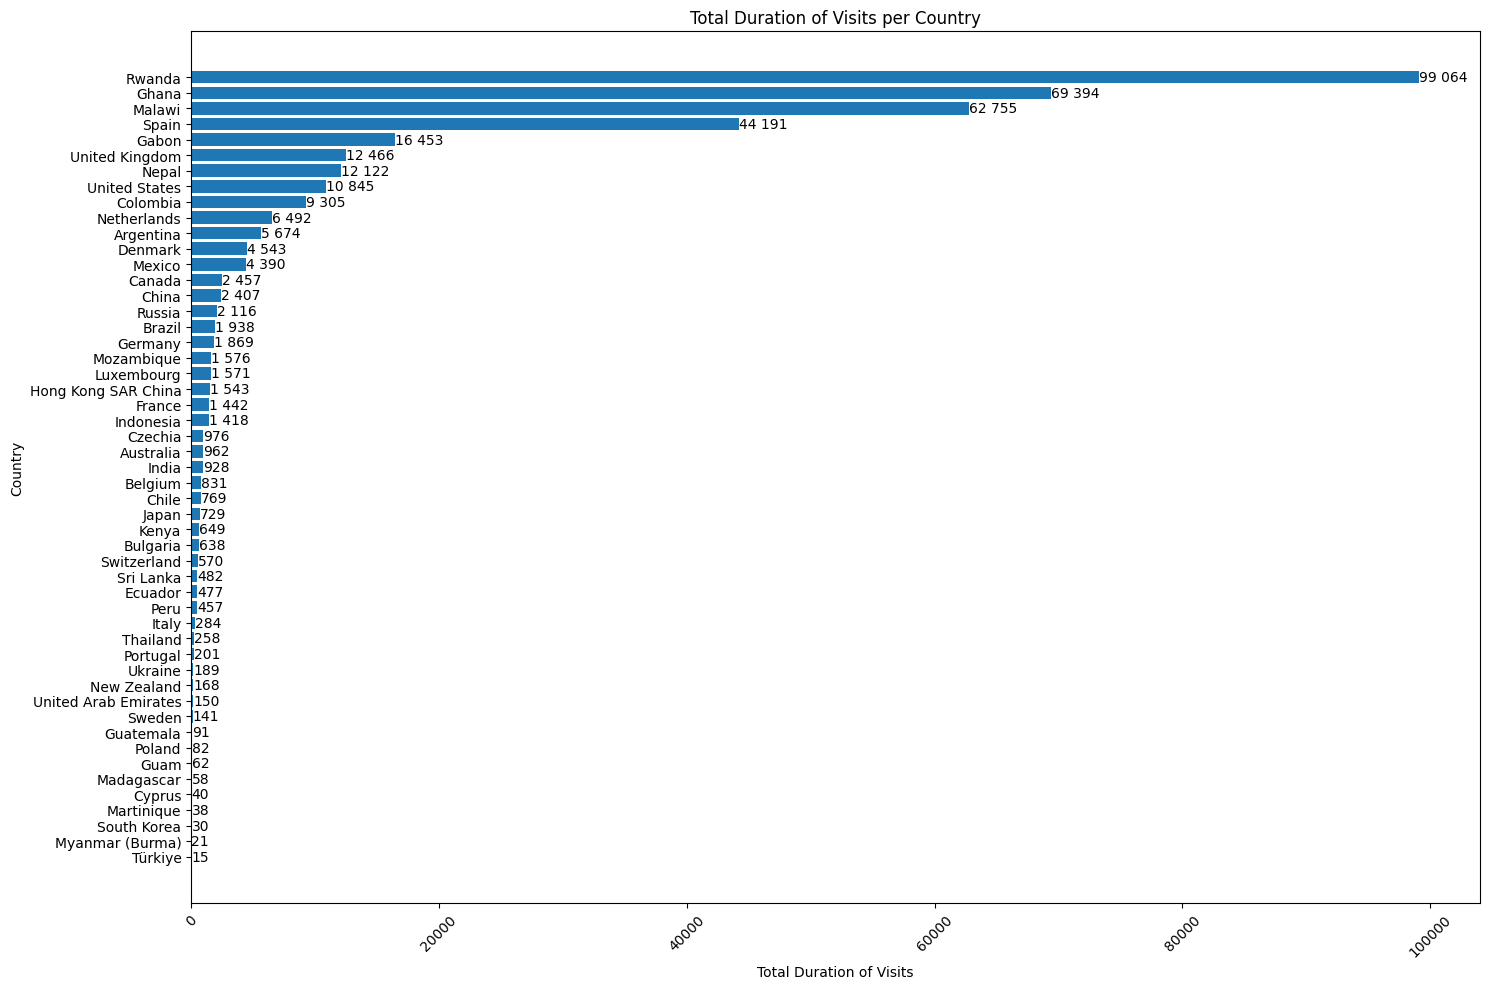

In [169]:
# Filter and aggregate the data
df['visitDuration'] = df['visitDuration'].astype('int')

country_time_spent_sum = df.groupby('country')['visitDuration'].sum().sort_values().reset_index()
country_time_spent_sum = country_time_spent_sum[country_time_spent_sum['visitDuration'] != 0]


# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.barh(country_time_spent_sum['country'], country_time_spent_sum['visitDuration'])

# Labeling and styling
plt.xlabel('Total Duration of Visits')
plt.ylabel('Country')
plt.title('Total Duration of Visits per Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove y-axis grid lines for clarity
ax.yaxis.grid(False)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width
    formatted_label = '{:,.0f}'.format(width).replace(',', ' ')  # Replace comma with space
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, formatted_label, va='center')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [170]:
# Group by 'country', sort cities alphabetically, and aggregate
aggregated_df = df.groupby('country').agg(
    cities=('city', lambda x: ', '.join(sorted(x.unique()))),  # Sort cities alphabetically and join them by comma
    counts=('city', 'count')  # Count the number of cities per country
).reset_index()

aggregated_df = aggregated_df.sort_values(by='counts', ascending=False)

# Function to split the cities into chunks of 10
def split_cities(cities):
    cities_list = cities.split(', ')
    for i in range(0, len(cities_list), 10):
        yield ', '.join(cities_list[i:i+10])

# Iterate over each row and print the information in the specified format
for index, row in aggregated_df.iterrows():
    print(f"{row['country']} - {row['counts']}")
    # Print cities in chunks of 10
    for chunk in split_cities(row['cities']):
        print(chunk)
    print()  # Print a blank line

Rwanda - 549
Gisenyi, Gitarama, Kigali, Kigali (Kimihurura), Kigali (Remera)

Malawi - 315
Blantyre, Blantyre (Mandala), Lilongwe, Makata, Mangochi, Mchinji, Mzuzu, Nkhata Bay, Salima, Zomba

Spain - 213
Albacete, Alboraya, Alcobendas, Alfondeguilla, Barcelona, Calahorra, Campanet, Cedillo del Condado, Chamartin, Ciudad Lineal
El Arahal, Elche, Gijón, León, Liérganes, Madrid, Majadahonda, Maracena, Murcia, Ordes
Outes, Panticosa, Pola de Siero, Pozuelo de Alarcón, Quintanar de la Orden, Riudarenes, San Sebastián de los Reyes, Sant Adrià de Besòs, Sant Joan Despí, Sant Joan d'Alacant
Sant Martí, Sarriguren, Seville, Terrassa, Toledo, Valladolid, Vigo

United States - 197
Albuquerque (Central Campus), Anaheim, Arundel, Ashburn, Atlanta (Collier Heights), Austin, Austin (University of Texas at Austin), Bayonne, Bear, Birmingham
Boardman, Boca Raton, Boston, Boulder (Downtown), Buffalo, Burien, Charleston, Charlotte (Charlotte center city), Cheyenne, Chicago
Cicero, Cincinnati (Corryville)

In [77]:
unique_city_count = df['city'].nunique()
print(unique_city_count)

606


In [171]:
# Group by 'country' and count unique cities
country_city_counts = df.groupby('country')['city'].nunique().reset_index(name='num_cities')
# Set the option to display all rows (None means no limit)
pd.set_option('display.max_rows', None)
# Display the resulting table
print(country_city_counts)

                 country  num_cities
0                Albania           1
1                Algeria           1
2      Antigua & Barbuda           1
3              Argentina           8
4                Armenia           1
5              Australia          17
6                Austria           2
7             Azerbaijan           1
8             Bangladesh           1
9                Belgium           9
10               Bolivia           3
11                Brazil          22
12              Bulgaria           3
13                Canada          21
14                 Chile           9
15                 China          20
16              Colombia          24
17      Congo - Kinshasa           1
18               Croatia           1
19                Cyprus           2
20               Czechia           4
21               Denmark          12
22               Ecuador           3
23                 Egypt           1
24               Estonia           1
25               Finland           2
2